In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [236]:
# Importing the train and test data:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print(train.shape, test.shape)

(1460, 81) (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


As we can see there are many categorical features and hence they have to be encoded before we can feed them into a model

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
train.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

We can also see that there are features with NaN values in them. We cannot delete those samples from our data as there are certain features like "PoolQC" which only have 7 non-NaN values. We have to check if ignoring the features with NaN values in them is a viable option as we've a lot of other features and if the value addition because of these isn't much. Otherwise, we will have to follow one of the multiple available options to fill the NaN values by mean, median, highest, mode or zeros based on the feature individually.

#### Before that we'll have to make a dev set from the available train data in order to compare and evaluate the performance of the models we make and use the same for hyper-tuning different models.

In [7]:
def train_val_split(input_data, split = 0.9):
    
    train = input_data.sample(frac = split)
    train_index = list(train.index)
    val = input_data[(input_data.index.isin(train_index) == False)]

    train.reset_index(drop = True, inplace = True)
    val.reset_index(drop = True, inplace = True)
    
    return train, val

In [8]:
x_train, x_val = train_val_split(train, 0.8)

In [9]:
x_train.shape, x_val.shape

((1168, 81), (292, 81))

In [10]:
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,817,20,RL,NaN,11425,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137000
1,913,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,620,7,2006,WD,Abnorml,88000
2,270,20,RL,NaN,7917,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal,148000
3,832,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,151000
4,822,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,93000


### Baseline

Predicting average sale price of the train data as baseline

In [11]:
baseline_pred = np.mean(x_train['SalePrice'])

In [12]:
baseline_pred

181326.6309931507

In [13]:
baseline_preds = [baseline_pred for i in range(len(x_val))]

In [14]:
log_rmse(x_val, baseline_preds, x_val[['Id', 'SalePrice']])

NameError: name 'log_rmse' is not defined

### Linear Regression on select Basic Numeric Features

Trying to fit a Linear Regression Model on the numerical only and important features, based on intuition and description of the feature, to see the performance of the model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']], x_train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Evaluation:

Evaluation method chosen for this problem, as per the Kaggle Competition, is log RMSE. The log RMSE is RMSE between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [14]:
def log_rmse(dataset, preds, true):
    preds_ = pd.concat([dataset['Id'].reset_index(drop = True), pd.Series(preds)], axis = 1)
    preds_.rename(str, columns = {0:'SalePrice'}, inplace = True)
    true['log_pred'] = np.log(true['SalePrice'])
    preds_['log_pred'] = np.log(preds_['SalePrice'])
    eval_ = pd.merge(preds_, true, how = 'inner', on = 'Id')
    eval_['log_error'] = eval_['log_pred_x'] - eval_['log_pred_y']
    
    return np.sqrt(np.sum(eval_['log_error']**2)/len(eval_['log_error']))

In [19]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, lr.predict(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_train[['Id', 'SalePrice']])))
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, lr.predict(x_val[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_val[['Id', 'SalePrice']])))        

The train Log RMSE loss is 0.2480801658613171
The validation Log RMSE loss is 0.22624391115279022


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


This is an improvement from the baseline model, but we can clearly see that there is a lot of scope for improvement. By including the categorical features that can help better determine 'SalePrice' and removing the features with less importance we can improve the performance of the model without increasing the complexity much.

### Decision Tree on select Basic Numeric Features

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
dt = DecisionTreeRegressor()

In [17]:
dt.fit(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']], x_train['SalePrice'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, dt.predict(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_train[['Id', 'SalePrice']])))   
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, dt.predict(x_val[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_val[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.0011835521470119229
The validation Log RMSE loss is 0.2651209408304536


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


From the above log RMSE values we can understand that the model is suffering from overfitting. As the train log RMSE is close to zero and the validation error is 0.27, it is clear that the model has been overfitted to the train data and hence the model has to be tuned for the right hyper-parameters so that it doesn't overfit the train data

#### Hyper-Parameter tuning of the model to avoid overfitting

In [26]:
min_split = [2, 5, 10, 20, 50, 75, 100, 200, 300, 500, 750, 1000, 2000, 5000]
min_leaves = [1, 2, 5, 10, 20, 50, 75, 100, 200, 300, 500, 750, 1000, 2000, 5000]

In [ ]:
dt_train_acc = []
dt_val_acc = []
for i in min_split:
    for j in min_leaves:
        dt = DecisionTreeRegressor(min_samples_split = i, min_samples_leaf = j)
        dt.fit(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']], x_train['SalePrice'])
        dt_train_acc.append(log_rmse(x_train, dt.predict(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_train[['Id', 'SalePrice']]))
        dt_val_acc.append(log_rmse(x_val, dt.predict(x_val[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_val[['Id', 'SalePrice']]))

In [31]:
dt_train_acc[np.argmin(dt_val_acc)], np.min(dt_val_acc)

(0.17881359345610576, 0.22596608415074426)

The model performance on validation data has improved and the difference between the model's performance on train dataset and validation dataset has reduced indicating that the model isn't overfitting the train dataset. Although, the difference between train and validation error is high indicating that the model is still suffering from high variance. Also, the train error is also high now which means that the model is suffering from the bias issue as well. To improve the model's performance and reduce the bias and variance present in the model, we need to increase the qualitative features and data and opt for a better model that is more flexible and can learn the patterns in the data

### Random Forest on select Basic Numeric Features

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
rf = RandomForestRegressor()

In [37]:
rf.fit(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']], x_train['SalePrice'])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [38]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, rf.predict(x_train[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_train[['Id', 'SalePrice']])))
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, rf.predict(x_val[['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']]), x_val[['Id', 'SalePrice']])))  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(0.08552741900686368, 0.20812832080082125)

We can see that the model performance has improved by choosing a more complex and flexible model that can better discern the trends in the data. But again, we have the problem of the overfitting and hence we've to tune the model to reduce the overfitting of the model to the train dataset to improve the validation dataset performance.

We can try adding more data, in terms of more features, to the data that is fed into model to improve the model.

### Dealing with the features with Missing values:

Let's first inspect the data to identify the features with missing values and their missing ratios, so that we can decide whether we should remove them from our dataset or to fill them with some value and use them.

In [19]:
(len(x_train) - x_train.count()).reset_index()[(len(x_train) - x_train.count()).reset_index()[0] != 0].rename(str, columns = {'index': 'feature', 0: '#NaNs'})

,feature,#NaNs
3,LotFrontage,209
6,Alley,1092
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,27
31,BsmtCond,27
32,BsmtExposure,28
33,BsmtFinType1,27
35,BsmtFinType2,28
42,Electrical,1


Here's a brief description of the above features and what they actually are:

* LotFrontage: Linear feet of street connected to property
* Alley: Type of alley access
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinType2: Quality of second finished area (if present)
* Electrical: Electrical system
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories

In [20]:
missingRatio = (train.isnull().sum()/len(train)*100).sort_values(ascending = False)
missingRatio

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

Features like `Alley`, `PoolQC`, `Fence`, `MiscFeature`, `FireplaceQu`, `LotFrontage` have a high missing ratio and hence aren't worth considering as they wouldn't add any value to model. Removing the features with missing ratio more than 15%. Also, replacing the feature `GarageYrBlt` with the year the house was built `YearBuilt`. As the remaining features with missing values are categorical and hence filling them with the mode of the feature. 

In [21]:
train_clean = train.copy()

In [22]:
#cols = train_clean[missingRatio[(missingRatio<=15) & (missingRatio >0)].index]
cols = train_clean[missingRatio[missingRatio >0].index]
for col in cols:
    if col == 'GarageYrBlt':
        train_clean[col].fillna(train_clean['YearBuilt'], inplace=True)
    else:
        train_clean[col].fillna(0, inplace=True)#train_clean[col].mode()[0], inplace=True)

In [23]:
#remove_cols = train_clean[missingRatio[missingRatio>15].index]
#train_clean.drop(remove_cols, axis = 1, inplace = True)

In [24]:
train_clean.shape

(1460, 81)

In [25]:
(train_clean.isnull().sum()/len(train_clean)*100).sort_values(ascending = False).unique()

array([0.])

Therefore, the data now has no missing values. Let's proceed to encoding the categorical features so that we can feed them as well to our model to improve the model's performance.

### Encoding all categorical Features

Also, As we've seen that the model still has a bias issue, we try to add more features from the available data to improve the model. Adding more features implies more data and more complexity to the model. It's upto us to decide whether the increased complexity and effort is worth the improvement in the model's performance.

In [26]:
train_encoded = pd.get_dummies(train_clean)

In [27]:
train_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


As we can see that encoding all the categorical features into numerical dummies has significantly increased the data to be fed into the model and now the dataset has 271 features instead of earlier 14 features.

In [28]:
x_train_encoded, x_val_encoded = train_val_split(train_encoded, 0.8)

In [29]:
x_train_encoded.shape, x_val_encoded.shape

((1168, 306), (292, 306))

In [31]:
missingRatio_test = (test.isnull().sum()/len(test)*100).sort_values(ascending = False)

In [32]:
test_clean = test.copy()

In [33]:
cols_test = test_clean[missingRatio_test[missingRatio_test >0].index]
for col in cols_test:
    if col == 'GarageYrBlt':
        test_clean[col].fillna(test_clean['YearBuilt'], inplace=True)
    else:
        test_clean[col].fillna(0, inplace=True)#train_clean[col].mode()[0], inplace=True)

In [34]:
#remove_cols_test = test_clean[missingRatio_test[missingRatio_test>15].index]
#test_clean.drop(remove_cols, axis = 1, inplace = True)

In [35]:
test_clean.shape

(1459, 80)

In [36]:
(test_clean.isnull().sum()/len(test_clean)*100).sort_values(ascending = False).unique()

array([0.])

In [37]:
test_encoded = pd.get_dummies(test_clean)

In [38]:
test_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [372]:
test_encoded.shape

(1459, 293)

In [39]:
test.shape, test_clean.shape

((1459, 80), (1459, 80))

### Random Forest on all encoded features

In [42]:
rf = RandomForestRegressor()#max_depth=200, n_estimators=100)

In [43]:
rf.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, rf.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, rf.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.06707595500875017
The validation Log RMSE loss is 0.1721307361000159


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Here's comes a significant improvement in the performance of the model with the addition of more features. We can try ignoring the features that aren't actually contributing much to the model's performance.

At the same time, we have to check if the model is suffering from overfitting issue as the training accuracy is significantly low in comparison to validation accuracy.

In [237]:
max_depths = [1,3,5,7,10, None]
n_estimator = [10, 50, 100, 500, 1000]

In [238]:
rf_train_acc = []
rf_val_acc = []
for i in n_estimator:
    for j in max_depths:
        rf = RandomForestRegressor(n_estimators=i, max_depth=j)
        rf.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])
        rf_train_acc.append([i, j, log_rmse(x_train_encoded, rf.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])])
        rf_val_acc.append([i, j, log_rmse(x_val_encoded, rf.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [250]:
rf_validation = pd.DataFrame(rf_train_acc).merge(pd.DataFrame(rf_val_acc), on = [0,1]).rename(str, columns = {0: '#estimators', 1:'max_depth', '2_x': 'train_acc', '2_y': 'val_acc'})     
rf_validation.sort_values(by = 'val_acc')     

,#estimators,max_depth,train_acc,val_acc
29,1000,NaN,0.060001,0.139255
23,500,NaN,0.059692,0.140805
28,1000,10.0,0.069952,0.141361
16,100,10.0,0.071693,0.141548
17,100,NaN,0.059316,0.141800
22,500,10.0,0.069979,0.141895
11,50,NaN,0.064976,0.141986
10,50,10.0,0.073467,0.142735
5,10,NaN,0.072404,0.145828
4,10,10.0,0.076216,0.146669


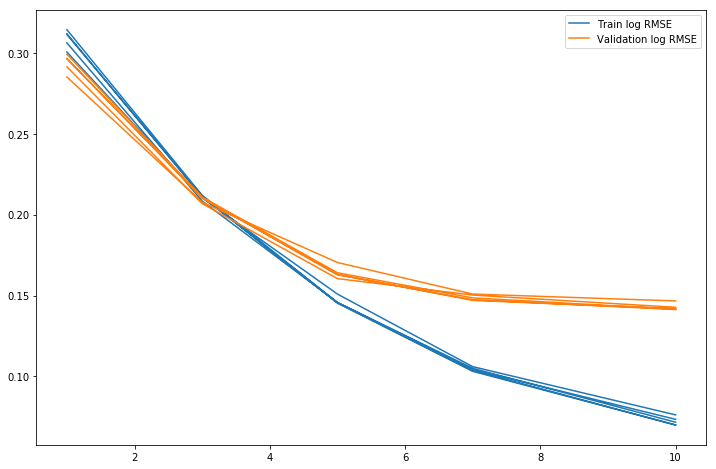

In [257]:
plt.figure(figsize= (12,8))
plt.plot(rf_validation["max_depth"], rf_validation['train_acc'], label = 'Train log RMSE')
plt.plot(rf_validation["max_depth"], rf_validation['val_acc'], label = 'Validation log RMSE')
plt.legend()

It seems that our model isn't actually overfitting the train dataset as the validation accuracy is also decreasing with the training accuracy. Hence, our model is suffering from high variance and 


-- Comments on Overfitting and variance

### Dropping features with less value addition to reduce the complexity of the model

In [228]:
rf = RandomForestRegressor(max_depth=7, n_estimators=1000)

In [219]:
rf.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [220]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, rf.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded.dropna(axis=1, how='any')[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, rf.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.10009364600288942
The validation Log RMSE loss is 0.15534905387137535


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [229]:
rf.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [230]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, rf.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_train_encoded.dropna(axis=1, how='any')[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, rf.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.10040178094088165
The validation Log RMSE loss is 0.15405233001386212


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [283]:
feature_importances = pd.DataFrame([x_train_encoded.drop(['Id', 'SalePrice'], axis = 1).columns, rf.feature_importances_]).T.rename(str, columns = {0:'feature',1:'importance'})
feature_importances.sort_values(by = 'importance', ascending = False)

,feature,importance
2,OverallQual,0.631849
14,GrLivArea,0.0935247
12,2ndFlrSF,0.0471592
10,TotalBsmtSF,0.0352697
7,BsmtFinSF1,0.0335627
11,1stFlrSF,0.0193869
25,GarageArea,0.0134051
24,GarageCars,0.0133213
1,LotArea,0.0107316
4,YearBuilt,0.00774468


Taking the features with atleast 0.001 importance as any contribution less than that seems of negligible importance.

In [319]:
rf = RandomForestRegressor(max_depth=7, n_estimators=500)

In [320]:
rf.fit(x_train_encoded[feature_importances[feature_importances['importance'] >= 0.001]['feature']], x_train_encoded.dropna(axis=1, how='any')['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [321]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, rf.predict(x_train_encoded[feature_importances[feature_importances['importance'] >= 0.001]['feature']]), x_train_encoded.dropna(axis=1, how='any')[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, rf.predict(x_val_encoded[feature_importances[feature_importances['importance'] >= 0.001]['feature']]), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.10608257664132277
The validation Log RMSE loss is 0.14925307307216232


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


As expected, by considering features with more than 0.1% importance - as low as 27 features - we're able to get the same result as many as 270 features,

### Other method for considering significant features only:

### PCA:

In [354]:
from sklearn.decomposition import PCA

In [377]:
pca = PCA(n_components=25)

In [378]:
pca_result = pca.fit_transform(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1))

In [379]:
pca_result.shape

(1168, 25)

In [380]:
pca.transform(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)).shape

(292, 25)

In [387]:
rf = RandomForestRegressor(max_depth=7, n_estimators=500)

In [388]:
rf.fit(pca_result, x_train_encoded['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [389]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, rf.predict(pca_result), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, rf.predict(pca.transform(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1))), x_val_encoded[['Id', 'SalePrice']])))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The train Log RMSE loss is 0.11779187115672335
The validation Log RMSE loss is 0.15771303128408048


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Gradient Boosting Algorithm:

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
gbr = GradientBoostingRegressor(n_estimators = 1000)

In [49]:
gbr.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])
#gbr.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

KeyError: "Index(['MSZoning_0', 'Utilities_0', 'Exterior1st_0', 'Exterior2nd_0',\n       'KitchenQual_0', 'Functional_0', 'SaleType_0'],\n      dtype='object') not in index"

In [242]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded[test_encoded.columns], gbr.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded[test_encoded.columns], gbr.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.018092867191003968
The validation Log RMSE loss is 0.12919254012101689


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Grid Search to obtain Best Parameters:

First we perform coarse grid search and then we can further narrow down on the hyper-parameters, if we want to, to find the ideal optimal parameters

In [50]:
from sklearn.model_selection import GridSearchCV

In [361]:
clf = GradientBoostingRegressor()

param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 7, 10],
              'min_samples_leaf': [20, 50, 100, 150],
              #"max_features": [25, 50, None],
              #"min_child_weight": [1, 2],
              "n_estimators": [1000],
              "subsample": [0.6, 0.8, 1.0]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_log_error', n_jobs = 6, verbose=True)
start = time()
grid_search.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   30.7s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 324 out of 324 | elapsed:  5.3min finished


GridSearchCV took 323.21 seconds for 108 candidate parameter settings.


In [362]:
grid_search.best_score_, grid_search.best_params_

(-0.01912258414275049,
 {'learning_rate': 0.05,
  'max_depth': 3,
  'min_samples_leaf': 20,
  'n_estimators': 1000,
  'subsample': 0.8})

In [363]:
gbr = GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.05, max_depth= 3, min_samples_leaf=20, subsample= 0.8)

In [364]:
gbr.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [365]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.07123208354584189
The validation Log RMSE loss is 0.10522042763395345


In [234]:
gbr.fit(pca_result, x_train_encoded['SalePrice'])
#gbr.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

NameError: name 'pca_result' is not defined

In [423]:
print('The train Log RMSE loss is {}'.format(log_rmse(pca_result, gbr.predict(pca_result), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, gbr.predict(pca.transform(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1))), x_val_encoded[['Id', 'SalePrice']])))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The train Log RMSE loss is 0.09884093959482122
The validation Log RMSE loss is 0.14518152495621836


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### XGBoost

In [51]:
import xgboost as xgb

In [52]:
#dtrain = xgb.DMatrix(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1))
#dtest = xgb.DMatrix(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1))

In [53]:
xgb_model = xgb.XGBRegressor(n_estimators= 1000)

In [54]:
xgb_model.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.022240859715494516
The validation Log RMSE loss is 0.1573674986688309


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [271]:
feature_importances_xgb = pd.DataFrame([x_train_encoded.drop(['Id', 'SalePrice'], axis = 1).columns, xgb_model.feature_importances_]).T.rename(str, columns = {0:'feature',1:'importance'})
feature_importances_xgb.sort_values(by = 'importance', ascending = False)

,feature,importance
1,LotArea,0.114708
9,BsmtUnfSF,0.0679962
0,MSSubClass,0.0566088
25,GarageArea,0.0440291
14,GrLivArea,0.0420915
4,YearBuilt,0.039349
33,MoSold,0.0385441
10,TotalBsmtSF,0.0367257
6,MasVnrArea,0.0358016
7,BsmtFinSF1,0.0341024


### Hyper-Parameter Tuning for XGBoost:

In [137]:
xgb_model = xgb.XGBRegressor(n_estimators= 1000, learning_rate = 0.1, reg_lambda = 0.1, reg_alpha = 0.2)

In [138]:
xgb_model.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.2, reg_lambda=0.1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [139]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.018889821535051275
The validation Log RMSE loss is 0.12598543445159108


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [737]:
xgb_model = xgb.XGBRegressor(n_estimators= 1000)

In [ ]:
xgb_model.fit(x_train_encoded[feature_importances_xgb[feature_importances_xgb['importance'] >= 0.001]['feature']], x_train_encoded.dropna(axis=1, how='any')['SalePrice'])

In [477]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(x_train_encoded[feature_importances_xgb[feature_importances_xgb['importance'] >= 0.001]['feature']]), x_train_encoded.dropna(axis=1, how='any')[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(x_val_encoded[feature_importances_xgb[feature_importances_xgb['importance'] >= 0.001]['feature']]), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.02400275888303013
The validation Log RMSE loss is 0.12137319337576213


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [462]:
xgb_model.fit(pca_result, x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [465]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(pca_result), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(pca.transform(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1))), x_val_encoded[['Id', 'SalePrice']])))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


The train Log RMSE loss is 0.018614189417995787
The validation Log RMSE loss is 0.13656416741213356


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


### Prediction on Test Set

In [105]:
missingRatio_test = (test.isnull().sum()/len(test)*100).sort_values(ascending = False)

In [106]:
test_clean = test.copy()

In [107]:
cols_test = test_clean[missingRatio_test[(missingRatio_test<=15) & (missingRatio_test >0)].index]
for col in cols_test:
    if col == 'GarageYrBlt':
        test_clean[col].fillna(test_clean['YearBuilt'], inplace=True)
    else:
        test_clean[col].fillna(train_clean[col].mode()[0], inplace=True)

In [108]:
remove_cols_test = test_clean[missingRatio_test[missingRatio_test>15].index]
test_clean.drop(remove_cols_test, axis = 1, inplace = True)

In [109]:
(test_clean.isnull().sum()/len(test_clean)*100).sort_values(ascending = False).unique()

array([0.])

In [110]:
test_encoded = pd.get_dummies(test_clean)

In [111]:
test_encoded.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [112]:
test_encoded.shape

(1459, 254)

In [113]:
x_train_encoded.shape

(1168, 271)

In [114]:
xgb_model = xgb.XGBRegressor(n_estimators= 1000)

In [115]:
xgb_model.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [116]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded[test_encoded.columns], xgb_model.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded[test_encoded.columns], xgb_model.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.023302772671876734
The validation Log RMSE loss is 0.1267209784771983


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [126]:
preds = pd.DataFrame([test_encoded['Id'].apply(int), xgb_model.predict(test_encoded.drop('Id', axis = 1))]).T.rename(str, columns = {'Unnamed 0': 'SalePrice'})

In [127]:
preds.to_csv('lazy_1st_Submission.csv', index= False)

### Grid Search to obtain Best Parameters:

First we perform coarse grid search and then we can further narrow down on the hyper-parameters, if we want to, to find the ideal optimal parameters

In [315]:
from sklearn.model_selection import GridSearchCV

In [538]:
clf = xgb.XGBRegressor(booster='gbtree')

param_grid = {"max_depth": [3, 5, 10],
              "learning_rate": [0.01, 0.1],
              "reg_lambda": [0.01, 0.1, 1],
              "reg_alpha": [0.01, 0.1, 1],
              #"max_features": [25, 50, None],
              #"min_child_weight": [1, 2],
              "n_estimators": [500]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_log_error', n_jobs = 6, verbose=True)
start = time()
grid_search.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded.dropna(axis=1, how='any')['SalePrice'])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   31.9s
[Parallel(n_jobs=6)]: Done 162 out of 162 | elapsed:  3.3min finished


GridSearchCV took 200.22 seconds for 54 candidate parameter settings.


In [539]:
grid_search.best_score_, grid_search.best_params_

(-0.017024705525953494,
 {'learning_rate': 0.1,
  'max_depth': 3,
  'n_estimators': 500,
  'reg_alpha': 0.1,
  'reg_lambda': 0.01})

In [64]:
from sklearn.model_selection import KFold

def xValXGBoost(dataset, label_name, k, cs):

    kf = KFold(n_splits = k)
    
    train_errors = {c : [] for c in cs}
    val_errors = {c : [] for c in cs}
    
    for train, validate in kf.split(dataset):
        
        cv_train, cv_validate = dataset.drop(['Id', label_name], axis =1).iloc[train], dataset.drop(['Id', label_name], axis =1).iloc[validate]
        cv_train_Y, cv_validate_Y = dataset[label_name].iloc[train], dataset[label_name].iloc[validate]
        
        for c in cs:
            xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 7, n_estimators= 1000, learning_rate= 0.095, reg_lambda = 10, reg_alpha= c)
            xgb_model.fit(cv_train, cv_train_Y)
            
            train_error_c = log_rmse(dataset.iloc[train], xgb_model.predict(cv_train), dataset[['Id', label_name]].iloc[train])
            val_error_c = log_rmse(dataset.iloc[validate], xgb_model.predict(cv_validate), dataset[['Id', label_name]].iloc[validate])
            train_errors[c] += [train_error_c]
            val_errors[c] += [val_error_c]

    return train_errors, val_errors

#### Max_depth Tuning

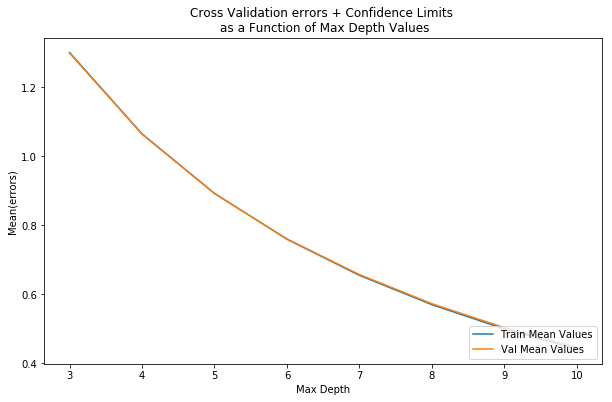

In [746]:
m_depth = [i for i in range(3, 11)]
train_errors_m_depth, val_errors_m_depth = xValXGBoost(train_encoded, 'SalePrice', 3, m_depth)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_m_depth = {i: sum(train_errors_m_depth[i])/len(train_errors_m_depth[i]) for i in train_errors_m_depth.keys()}
val_mean_m_depth = {i: sum(val_errors_m_depth[i])/len(val_errors_m_depth[i]) for i in val_errors_m_depth.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(m_depth, train_mean_m_depth.values(), label = 'Train Mean Values')
plt.plot(m_depth, val_mean_m_depth.values(), label = 'Val Mean Values')
#plt.xticks(np.log10(lr), np.round(lr, 2))
plt.xlabel('Max Depth')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of Max Depth Values')
plt.legend(loc = 'lower right')
plt.show()

#### Estimators Tuning

In [ ]:
est = np.delete(np.linspace(0, 5000, 11, dtype = 'int'), 0)
train_errors_est, val_errors_est = xValXGBoost(train_encoded, 'SalePrice', 3, est)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_est = {i: sum(train_errors_est[i])/len(train_errors_est[i]) for i in train_errors_est.keys()}
val_mean_est = {i: sum(val_errors_est[i])/len(val_errors_est[i]) for i in val_errors_est.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(est, train_mean_est.values(), label = 'Train Mean Values')
plt.plot(est, val_mean_est.values(), label = 'Val Mean Values')
plt.xlabel('#Estimators')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of #Estimators')
plt.legend(loc = 'lower right')
plt.show()

#### Learning Rate Tuning

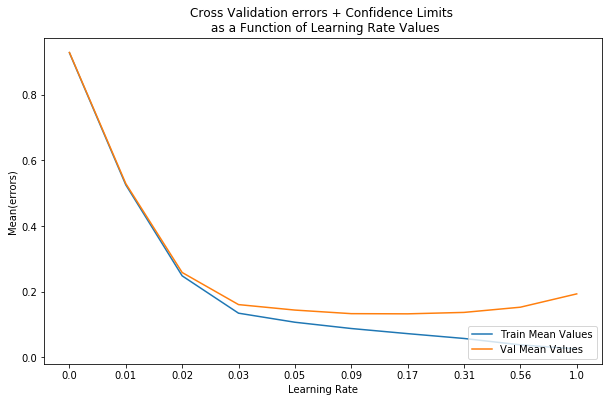

In [717]:
lr = np.logspace(np.log10(0.005), np.log10(1), base = 10, num = 10)
#train_errors_lr, val_errors_lr = xValXGBoost(train_encoded, 'SalePrice', 3, lr)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_lr = {i: sum(train_errors_lr[i])/len(train_errors_lr[i]) for i in train_errors_lr.keys()}
val_mean_lr = {i: sum(val_errors_lr[i])/len(val_errors_lr[i]) for i in val_errors_lr.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(np.log10(lr), train_mean_lr.values(), label = 'Train Mean Values')
plt.plot(np.log10(lr), val_mean_lr.values(), label = 'Val Mean Values')
plt.xticks(np.log10(lr), np.round(lr, 2))
plt.xlabel('Learning Rate')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of Learning Rate Values')
plt.legend(loc = 'lower right')
plt.show()

From the above graph, we can see that the sweet spot for learning rate is around 0.1

#### Min Child Weight Tuning

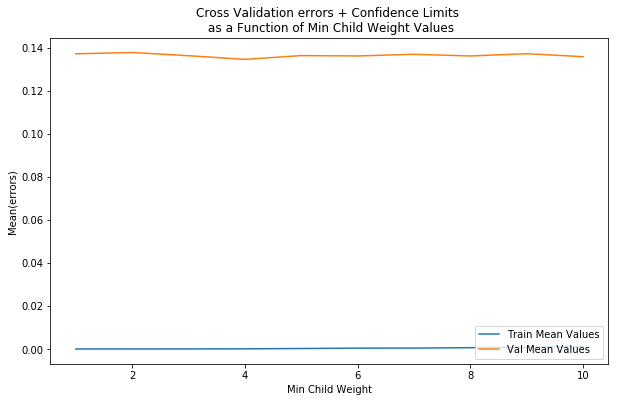

In [48]:
m_child = list(range(1,11,1))
train_errors_m_child, val_errors_m_child = xValXGBoost(train_encoded, 'SalePrice', 3, m_child)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_m_child = {i: sum(train_errors_m_child[i])/len(train_errors_m_child[i]) for i in train_errors_m_child.keys()}
val_mean_m_child = {i: sum(val_errors_m_child[i])/len(val_errors_m_child[i]) for i in val_errors_m_child.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(m_child, train_mean_m_child.values(), label = 'Train Mean Values')
plt.plot(m_child, val_mean_m_child.values(), label = 'Val Mean Values')
plt.xlabel('Min Child Weight')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of Min Child Weight Values')
plt.legend(loc = 'lower right')
plt.show()

#### Gamma Tuning

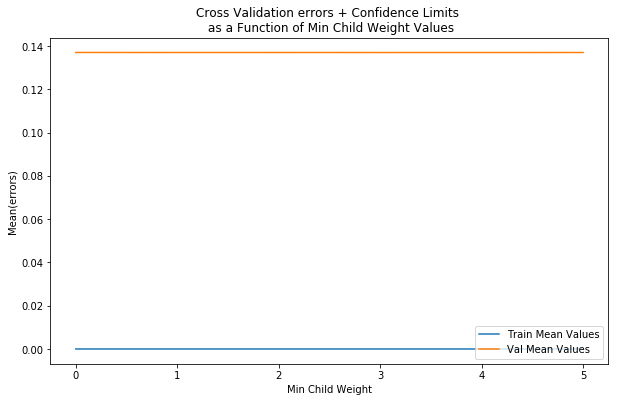

In [56]:
gm = np.linspace(0, 5, 11)
train_errors_gm, val_errors_gm = xValXGBoost(train_encoded, 'SalePrice', 3, gm)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_gm = {i: sum(train_errors_gm[i])/len(train_errors_gm[i]) for i in train_errors_gm.keys()}
val_mean_gm = {i: sum(val_errors_gm[i])/len(val_errors_gm[i]) for i in val_errors_gm.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(gm, train_mean_gm.values(), label = 'Train Mean Values')
plt.plot(gm, val_mean_gm.values(), label = 'Val Mean Values')
plt.xlabel('Gamma')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of Gamma Values')
plt.legend(loc = 'lower right')
plt.show()

#### L2 Regularization - Lambda Tuning

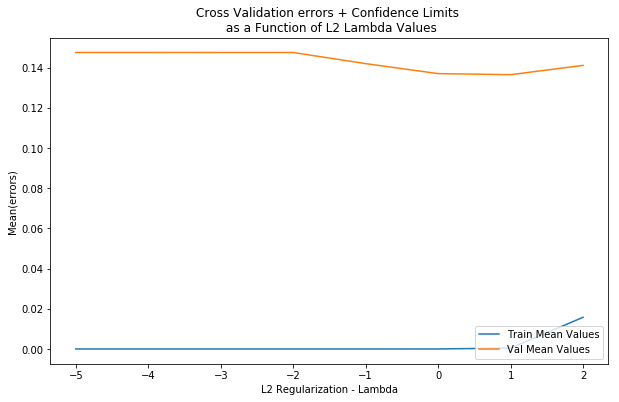

In [63]:
lmbda = [1e-5, 1e-2, 0.1, 1, 10, 100]
train_errors_lmbda, val_errors_lmbda = xValXGBoost(train_encoded, 'SalePrice', 3, lmbda)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_lmbda = {i: sum(train_errors_lmbda[i])/len(train_errors_lmbda[i]) for i in train_errors_lmbda.keys()}
val_mean_lmbda = {i: sum(val_errors_lmbda[i])/len(val_errors_lmbda[i]) for i in val_errors_lmbda.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(np.log10(lmbda), train_mean_lmbda.values(), label = 'Train Mean Values')
plt.plot(np.log10(lmbda), val_mean_lmbda.values(), label = 'Val Mean Values')
plt.xlabel('L2 Regularization - Lambda')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of L2 Lambda Values')
plt.legend(loc = 'lower right')
plt.show()

#### L1 Regularization - Lambda Tuning

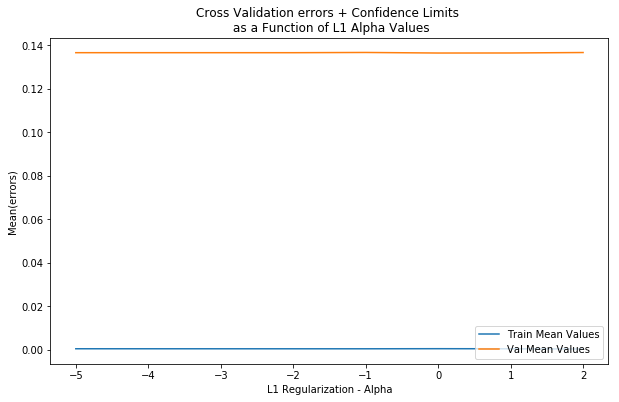

In [65]:
alph = [1e-5, 1e-2, 0.1, 1, 10, 100]
train_errors_alph, val_errors_alph = xValXGBoost(train_encoded, 'SalePrice', 3, alph)

#Calculating the Mean and the standard errors corresponding to the C values and the 1 standard error Mean(AUC) value:
train_mean_alph = {i: sum(train_errors_alph[i])/len(train_errors_alph[i]) for i in train_errors_alph.keys()}
val_mean_alph = {i: sum(val_errors_alph[i])/len(val_errors_alph[i]) for i in val_errors_alph.keys()}

#Plotting the graph as per the description above:
plt.figure(figsize = (10,6))
plt.plot(np.log10(alph), train_mean_alph.values(), label = 'Train Mean Values')
plt.plot(np.log10(alph), val_mean_alph.values(), label = 'Val Mean Values')
plt.xlabel('L1 Regularization - Alpha')
plt.ylabel('Mean(errors)')
plt.title('Cross Validation errors + Confidence Limits \n as a Function of L1 Alpha Values')
plt.legend(loc = 'lower right')
plt.show()

In [253]:
xgb_model2 = xgb.XGBRegressor(n_estimators= 1000)

In [254]:
xgb_model1 = xgb.XGBRegressor(booster='gbtree', n_estimators= 1000, learning_rate= 0.06, max_depth = 3, reg_alpha = 0.1, reg_lambda = 0.01)

In [56]:
#xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 6, n_estimators= 1000, learning_rate= 0.1, reg_lambda = 10, reg_alpha = 0.1)
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.1, reg_lambda = 0.01, min_child_weight= 4)

In [57]:
xgb_model.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])
#xgb_model1.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])
#xgb_model2.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])

KeyError: "Index(['MSZoning_0', 'Utilities_0', 'Exterior1st_0', 'Exterior2nd_0',\n       'KitchenQual_0', 'Functional_0', 'SaleType_0'],\n      dtype='object') not in index"

In [313]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded[test_encoded.columns], xgb_model.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded[test_encoded.columns], xgb_model.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.0005557481932167859
The validation Log RMSE loss is 0.13201746770323208


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [316]:
clf = xgb.XGBRegressor(booster='gbtree')

param_grid = {"max_depth": [3, 7],
              "learning_rate": [0.1],
              "reg_lambda": [10],
              "reg_alpha": [0.1],
              "subsample": [0.5, 0.8, 0.1],
              "colsample_bytree": [0.5, 0.8, 0.1],
              #"max_features": [25, 50, None],
              "min_child_weight": [1, 4, 10],
              "n_estimators": [1000]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_log_error', n_jobs = 6, verbose=True)
start = time()
grid_search.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded.dropna(axis=1, how='any')['SalePrice'])

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 162 out of 162 | elapsed:  3.2min finished


GridSearchCV took 200.30 seconds for 54 candidate parameter settings.


In [317]:
grid_search.best_score_, grid_search.best_params_

(-0.016968830064221133,
 {'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 3,
  'min_child_weight': 4,
  'n_estimators': 1000,
  'reg_alpha': 0.1,
  'reg_lambda': 10,
  'subsample': 0.8})

In [388]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.1, reg_lambda = 10, min_child_weight= 4, reg_alpha=0.1, colsample_bytree=0.5, subsample=0.8)

In [392]:
#xgb_model.fit(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1), x_train_encoded['SalePrice'])
xgb_model.fit(x_train_encoded.drop(['Id'], axis = 1), x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [393]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(x_train_encoded.drop(['Id'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(x_val_encoded.drop(['Id'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.008076297376389761
The validation Log RMSE loss is 0.045051352287835494


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [58]:
xgb_model.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [59]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded, xgb_model.predict(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded, xgb_model.predict(x_val_encoded.drop(['Id', 'SalePrice'], axis = 1)), x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.020412314924595852
The validation Log RMSE loss is 0.16099467526655437


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#Make evaluation set and try to tune on it

check for more features and make it better

implement more models

Check if correlation between features is more than 0.6 and check the effect of removing one of them.

Check for features with very low variance and remove them

In [206]:
pd.DataFrame(np.corrcoef(train_encoded.T), index = train_encoded.columns, columns = train_encoded.columns)['SalePrice'].sort_values()

ExterQual_TA            -0.589044
KitchenQual_TA          -0.519298
GarageFinish_Unf        -0.513906
BsmtQual_TA             -0.498545
MasVnrType_None         -0.367456
GarageType_Detchd       -0.354141
Foundation_CBlock       -0.343263
BsmtExposure_No         -0.319990
HeatingQC_TA            -0.312677
MSZoning_RM             -0.288065
LotShape_Reg            -0.267672
CentralAir_N            -0.251328
SaleType_WD             -0.242598
RoofStyle_Gable         -0.224744
PavedDrive_N            -0.212630
Foundation_BrkTil       -0.204117
Electrical_FuseA        -0.193978
Neighborhood_OldTown    -0.192189
Neighborhood_NAmes      -0.188513
Neighborhood_Edwards    -0.179949
Exterior1st_MetalSd     -0.167068
Neighborhood_IDOTRR     -0.164056
HouseStyle_1.5Fin       -0.163466
Exterior2nd_MetalSd     -0.162389
Exterior2nd_Wd Sdng     -0.161800
Exterior1st_Wd Sdng     -0.158619
KitchenQual_Fa          -0.157199
SaleCondition_Normal    -0.153990
Neighborhood_BrkSide    -0.143648
ExterCond_Fa  

Random Forest + XGBoost

In [257]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded[test_encoded.columns], (xgb_model.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + xgb_model1.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + xgb_model2.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + gbr.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + rf.predict(x_train_encoded[test_encoded.columns].drop(['Id'], axis = 1)))/5, x_train_encoded[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded[test_encoded.columns], (xgb_model.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + xgb_model1.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + xgb_model2.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + gbr.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)) + rf.predict(x_val_encoded[test_encoded.columns].drop(['Id'], axis = 1)))/5, x_val_encoded[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.0318849822742057
The validation Log RMSE loss is 0.1267289292082652


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
test_encoded[[col for col in x_train_encoded.columns if col in test_encoded.columns]]

In [384]:
preds_test = xgb_model.predict(test_encoded[[col for col in x_train_encoded.columns if col in test_encoded.columns]].drop('Id', axis = 1), validate_features= False)

In [266]:
preds_test = (xgb_model.predict(test_encoded.drop('Id', axis = 1)) + xgb_model1.predict(test_encoded.drop('Id', axis = 1)) + xgb_model2.predict(test_encoded.drop('Id', axis = 1)) + gbr.predict(test_encoded.drop('Id', axis = 1)) + rf.predict(test_encoded.drop('Id', axis = 1)))/5

In [385]:
preds = pd.DataFrame([test_encoded['Id'].apply(int), preds_test]).T.rename(str, columns = {'Unnamed 0': 'SalePrice'})

In [386]:
preds.head()

,Id,SalePrice
0,1461.0,74988.335938
1,1462.0,85885.335938
2,1463.0,87715.007812
3,1464.0,89287.023438
4,1465.0,84304.195312


In [387]:
preds.to_csv('lazy_5th_Submission.csv', index= False)

### Handling Missing Values & Encoding Categorical Features:

In [60]:
temp = pd.concat([train.drop('SalePrice', axis = 1), test], axis = 0, ignore_index= True)

In [61]:
missingRatio = (temp.isnull().sum()/len(temp)*100).sort_values(ascending = False)
missingRatio

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
FireplaceQu      48.646797
LotFrontage      16.649538
GarageCond        5.447071
GarageQual        5.447071
GarageYrBlt       5.447071
GarageFinish      5.447071
GarageType        5.378554
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
BsmtHalfBath      0.068517
Utilities         0.068517
Functional        0.068517
BsmtFullBath      0.068517
BsmtFinSF1        0.034258
Exterior1st       0.034258
Exterior2nd       0.034258
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
SaleType          0.034258
                   ...    
YearBuilt         0.000000
OverallCond       0.000000
SaleCondition     0.000000
Heating           0.000000
ExterQual         0.000000
ExterCond         0.000000
Y

In [62]:
temp_clean = temp.copy()

In [63]:
#cols = train_clean[missingRatio[(missingRatio<=15) & (missingRatio >0)].index]
cols = temp_clean[missingRatio[missingRatio >0].index]
for col in cols:
    if col == 'GarageYrBlt':
        temp_clean[col].fillna(temp_clean['YearBuilt'], inplace=True)
#['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2', 'BsmtFinSF1']
    elif col == 'GarageCars':
        value = np.mean(temp_clean['GarageCars']/temp_clean['GarageArea'])
        temp_clean[col].fillna(value, inplace=True)
    elif col in ['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'BsmtFinSF2', 'BsmtFinSF1']:
        value = np.mean(temp_clean[col]/temp_clean['LotArea'])
        temp_clean[col].fillna(value, inplace=True)
    else:
#        temp_clean[col].fillna(temp_clean[col].mode()[0], inplace=True)
        temp_clean[col].fillna(0, inplace=True)#train_clean[col].mode()[0], inplace=True)

In [64]:
temp_clean.shape

(2919, 80)

In [65]:
(temp_clean.isnull().sum()/len(temp_clean)*100).sort_values(ascending = False).unique()

array([0.])

In [66]:
temp_encoded = pd.get_dummies(temp_clean)

In [67]:
temp_encoded.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [68]:
train_encoded_1 = temp_encoded[temp_encoded['Id'] <=1460]
test_encoded_1 = temp_encoded[temp_encoded['Id'] >1460]

In [69]:
x_train_encoded_1, x_val_encoded_1 = train_val_split(train_encoded_1, 0.8)

In [70]:
x_train_encoded_1.shape, x_val_encoded_1.shape

((1168, 312), (292, 312))

In [71]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.06, reg_lambda = 500, reg_alpha=100, min_child_weight= 4, colsample_bytree=0.5, subsample=0.8)

In [72]:
xgb_model.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=100, reg_lambda=500, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [73]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), xgb_model.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), xgb_model.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.09912578000941752
The validation Log RMSE loss is 0.12262636692680556


In [74]:
gbr = GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.05, max_depth= 3, min_samples_leaf=20, subsample= 0.8)#, init=rf)

In [75]:
gbr.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.0675596998980726
The validation Log RMSE loss is 0.11283767285767965


In [77]:
rf = RandomForestRegressor(max_depth=50, n_estimators=1000)

In [78]:
rf.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), rf.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), rf.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.060448128103973126
The validation Log RMSE loss is 0.13299922981804624


In [80]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), (rf.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)) + gbr.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)) + xgb_model.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)))/3, train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), (rf.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)) + gbr.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)) + xgb_model.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)))/3, train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.06906528968271833
The validation Log RMSE loss is 0.1111268315545758


### Current Best Versions of the models:

In [76]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.1, reg_lambda = 10, min_child_weight= 4, reg_alpha=0.1, colsample_bytree=0.5, subsample=0.8)

In [77]:
xgb_model.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.1, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [78]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), xgb_model.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), xgb_model.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.0353284780878509
The validation Log RMSE loss is 0.1069023433991105


In [329]:
gbr = GradientBoostingRegressor(n_estimators = 1000)

In [330]:
gbr.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])
#gbr.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [331]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.018745775763382048
The validation Log RMSE loss is 0.10044968859897925


### XGBoost predictions as GBR's intialized predictions

In [81]:
gbr = GradientBoostingRegressor(n_estimators = 1000, init=xgb_model)

In [ ]:
gbr.fit(x_train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])]['SalePrice'])
#gbr.fit(x_train_encoded.drop(['Id', 'SalePrice'], axis = 1), x_train_encoded['SalePrice'])

In [349]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(x_val_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_val_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.018745775763382037
The validation Log RMSE loss is 0.10157391168500272


In [452]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.06, reg_lambda = 500, reg_alpha=100, min_child_weight= 4, colsample_bytree=0.5, subsample=0.8)

In [453]:
xgb_model.fit(train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(train_encoded_1['Id'])]['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=100, reg_lambda=500, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [454]:
print('The train Log RMSE loss is {}'.format(log_rmse(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), xgb_model.predict(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     

The train Log RMSE loss is 0.10335029025662534


In [455]:
gbr = GradientBoostingRegressor(n_estimators = 1000)

In [456]:
gbr.fit(train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(train_encoded_1['Id'])]['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [459]:
print('The train Log RMSE loss is {}'.format(log_rmse(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), gbr.predict(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     

The train Log RMSE loss is 0.023267244706832373


In [457]:
rf = RandomForestRegressor(max_depth=50, n_estimators=1000)

In [458]:
rf.fit(train_encoded_1.sort_values(by = 'Id').drop(['Id'], axis = 1), train_encoded[train_encoded['Id'].isin(train_encoded_1['Id'])]['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [460]:
print('The train Log RMSE loss is {}'.format(log_rmse(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True), rf.predict(train_encoded_1.sort_values(by = 'Id').reset_index(drop = True).drop(['Id'], axis = 1)), train_encoded[train_encoded['Id'].isin(x_train_encoded_1['Id'])].reset_index(drop = True)[['Id', 'SalePrice']])))     

The train Log RMSE loss is 0.06076065238966681


In [461]:
preds_test = (xgb_model.predict(test_encoded_1.drop('Id', axis = 1)) + gbr.predict(test_encoded_1.drop('Id', axis = 1)) + rf.predict(test_encoded_1.drop('Id', axis = 1)))/3

In [462]:
#preds = pd.DataFrame([test_encoded_1['Id'].apply(int), preds_test]).T.rename(str, columns = {'Unnamed 0': 'SalePrice'})

preds = pd.concat([pd.Series(test_encoded_1['Id'].apply(int).reset_index(drop = True)), pd.Series(preds_test)], axis = 1, ignore_index=True).rename(str, columns = {'Unnamed 0': 'SalePrice'})

In [463]:
preds.head()

,0,1
0,1461,123441.783253
1,1462,161855.292056
2,1463,182407.726387
3,1464,189232.376913
4,1465,187343.932255


In [520]:
preds.head()

,Id,SalePrice
0,1461.0,133508.328125
1,1462.0,166598.062500
2,1463.0,186737.687500
3,1464.0,199304.515625
4,1465.0,204816.453125


In [464]:
preds.to_csv('lazy_10th_Submission.csv', index= False)

### Feature Engineering

In [237]:
train = train[train.GrLivArea < 4000]

In [238]:
test['SalePrice'] = 0

In [239]:
train = pd.concat([train, test], axis = 0, ignore_index= True)

Feature Engineering inspired from: https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset/notebook?scriptVersionId=379776

In [ ]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, 'GarageYrBlt'] = train.loc[:, 'GarageYrBlt'].fillna(train['YearBuilt'])
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"]

In [241]:
# Some numerical features are actually really categories
train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [242]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [147]:
# Create new features
# 1* Simplifications of existing features
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]
# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]
# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]
# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]
# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]
# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]
# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]
# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]
# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]
# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]
# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]
# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]
# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]
# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])
# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]
# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]
# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [148]:
# Create new features
# 3* Polynomials on the top 10 existing features
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

In [243]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
train_num = train[numerical_features]
train_cat = train[categorical_features]

Numerical features : 55
Categorical features : 26


In [244]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.median())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 3
Remaining NAs for numerical features in train : 0


In [235]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew
skewness = train_num.drop('SalePrice', axis = 1).apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
train_num.drop('SalePrice', axis = 1)[skewed_features] = np.log1p(train_num[skewed_features])

243 skewed numerical features to log transform


In [245]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))
train_cat = pd.get_dummies(train_cat)
print("Remaining NAs for categorical features in train : " + str(train_cat.isnull().values.sum()))

NAs for categorical features in train : 8
Remaining NAs for categorical features in train : 0


In [246]:
# Join categorical and numerical features
train = pd.concat([train_num, train_cat], axis = 1)
print("New number of features : " + str(train.shape[1]))

New number of features : 258


In [249]:
test = train[train['Id'] >1460].drop('SalePrice', axis = 1)
train = train[train['Id'] <=1460]

In [251]:
train.shape, test.shape

((1456, 258), (1459, 257))

In [307]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [308]:
def train_val_split(input_data, split = 0.9):
    
    train = input_data.sample(frac = split)
    train_index = list(train.index)
    val = input_data[(input_data.index.isin(train_index) == False)]

    train.reset_index(drop = True, inplace = True)
    val.reset_index(drop = True, inplace = True)
    
    return train, val

In [321]:
def rmse_log_preds(dataset, preds, true):
    preds_ = pd.concat([dataset['Id'].reset_index(drop = True), pd.Series(preds)], axis = 1)
    preds_.rename(str, columns = {0:'SalePrice'}, inplace = True)
    true['SalePrice'] = np.expm1(true['SalePrice'])
    true['log_pred'] = np.log(true['SalePrice'])
    preds_['log_pred'] = np.log(preds_['SalePrice'])
    eval_ = pd.merge(preds_, true, how = 'inner', on = 'Id')
    eval_['log_error'] = eval_['log_pred_x'] - eval_['log_pred_y']
    
    return np.sqrt(np.sum(eval_['log_error']**2)/len(eval_['log_error']))

In [313]:
x_train, x_val = train_val_split(train, 0.8)

In [314]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.06, reg_lambda = 10, reg_alpha=300, min_child_weight= 4, colsample_bytree=0.5, subsample=0.8)

In [315]:
xgb_model.fit(x_train.drop(['Id', 'SalePrice'], axis = 1), x_train['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=300, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [316]:
print('The train Log RMSE loss is {}'.format(rmse_log_preds(x_train, xgb_model.predict(x_train.drop(['Id', 'SalePrice'], axis = 1)), x_train[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(rmse_log_preds(x_val, xgb_model.predict(x_val.drop(['Id', 'SalePrice'], axis = 1)), x_val[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.46190056329879364
The validation Log RMSE loss is 0.47309966434268513


In [322]:
print('The train Log RMSE loss is {}'.format(rmse_log_preds(x_train, np.expm1(xgb_model.predict(x_train.drop(['Id', 'SalePrice'], axis = 1))), x_train[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(rmse_log_preds(x_val, np.expm1(xgb_model.predict(x_val.drop(['Id', 'SalePrice'], axis = 1))), x_val[['Id', 'SalePrice']])))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


The train Log RMSE loss is 0.4619030373940018
The validation Log RMSE loss is 0.4731023144241938


In [266]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, xgb_model.predict(x_train.drop(['Id', 'SalePrice'], axis = 1)), x_train[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, xgb_model.predict(x_val.drop(['Id', 'SalePrice'], axis = 1)), x_val[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.051618408322616084
The validation Log RMSE loss is 0.11306080235805557


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [278]:
gbr = GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.05, max_depth= 3, min_samples_leaf=20, subsample= 0.8)

In [279]:
gbr.fit(x_train.drop(['Id', 'SalePrice'], axis = 1), x_train['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [280]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, gbr.predict(x_train.drop(['Id', 'SalePrice'], axis = 1)), x_train[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, gbr.predict(x_val.drop(['Id', 'SalePrice'], axis = 1)), x_val[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.06331737642404925
The validation Log RMSE loss is 0.11407721959401818


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [281]:
xgb_model = xgb.XGBRegressor(booster='gbtree', max_depth = 3, n_estimators= 1000, learning_rate= 0.06, reg_lambda = 10, reg_alpha=300, min_child_weight= 4, colsample_bytree=0.5, subsample=0.8)

In [282]:
xgb_model.fit(train.drop(['Id', 'SalePrice'], axis = 1), train['SalePrice'])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.06, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=300, reg_lambda=10, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

In [283]:
gbr = GradientBoostingRegressor(n_estimators= 1000, learning_rate= 0.05, max_depth= 3, min_samples_leaf=20, subsample= 0.8)

In [284]:
gbr.fit(train.drop(['Id', 'SalePrice'], axis = 1), train['SalePrice'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=0.8, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [302]:
preds = (xgb_model.predict(test.drop(['Id'], axis =1)) + gbr.predict(test.drop(['Id'], axis = 1)))/2

In [303]:
preds = pd.concat([pd.Series(test['Id'].apply(int).reset_index(drop = True)), pd.Series(preds)], axis = 1, ignore_index=True).rename(str, columns = {0: 'Id', 1:'SalePrice'})

In [304]:
preds.shape

(1459, 2)

In [305]:
preds.head()

,Id,SalePrice
0,1461,128180.013623
1,1462,160033.042630
2,1463,185802.422270
3,1464,192787.519796
4,1465,194054.230938


In [306]:
preds.to_csv('Lazy_11th_Submission.csv', index = False)

In [202]:
rf = RandomForestRegressor(max_depth=50, n_estimators=1000)

In [203]:
rf.fit(x_train.drop(['Id', 'SalePrice'], axis = 1), x_train['SalePrice'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [204]:
print('The train Log RMSE loss is {}'.format(log_rmse(x_train, rf.predict(x_train.drop(['Id', 'SalePrice'], axis = 1)), x_train[['Id', 'SalePrice']])))     
print('The validation Log RMSE loss is {}'.format(log_rmse(x_val, rf.predict(x_val.drop(['Id', 'SalePrice'], axis = 1)), x_val[['Id', 'SalePrice']])))

The train Log RMSE loss is 0.05566799462031894
The validation Log RMSE loss is 0.1304831618474778


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
